<a href="https://colab.research.google.com/github/SorenRobin/poke-stats/blob/main/Github_Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('all_1025_pokemon_stats_mar2025.csv')

In [ ]:
df.shape

(1184, 24)

In [ ]:
df.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [ ]:
# There are currently 1025 different Pokémon species in the National Dex, filtering for alternate forms to check for numerical discrepencies in data
alt_forms = df[df['Alt Form Flag'] == True]
alt_forms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 1182
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   159 non-null    object
 1   National Dex #         159 non-null    int64 
 2   Primary Typing         159 non-null    object
 3   Secondary Typing       128 non-null    object
 4   Secondary Typing Flag  159 non-null    bool  
 5   Generation             159 non-null    object
 6   Legendary Status       159 non-null    bool  
 7   Form                   159 non-null    object
 8   Alt Form Flag          159 non-null    bool  
 9   Evolution Stage        159 non-null    int64 
 10  Number of Evolution    159 non-null    int64 
 11  Color ID               159 non-null    object
 12  Catch Rate             159 non-null    int64 
 13  Height (dm)            159 non-null    int64 
 14  Weight (hg)            159 non-null    int64 
 15  Height (in)            159 

In [ ]:
# Basic math 'cuz I can't be bothered to open my PC's calculator app :V
1184 - 159
# Yup, we are green, squad. Subtracting the total number of Alt Forms from the total rows equals the current National Dex's maximum of 1025 Pokémon.

1025

In [ ]:
# Oh look, it's my favorite Blaze Pokémon!
print(df[df['National Dex #'] == 257])

              Name  National Dex # Primary Typing Secondary Typing  \
324       blaziken             257           fire         fighting   
325  blaziken-mega             257           fire         fighting   

     Secondary Typing Flag      Generation  Legendary Status  Form  \
324                   True  generation-iii             False  Base   
325                   True  generation-iii              True  Mega   

     Alt Form Flag  Evolution Stage  ...  Weight (hg) Height (in)  \
324          False                3  ...          520          75   
325           True                3  ...          520          75   

     Weight (lbs)  Base Stat Total  Health  Attack  Defense  Special Attack  \
324           115              530      80     120       70             110   
325           115              630      80     160       80             130   

     Special Defense  Speed  
324               70     80  
325               80    100  

[2 rows x 24 columns]


In [ ]:
# And can't forget my favorite trauma blorbo!
print(df[df['National Dex #'] == 150])

              Name  National Dex # Primary Typing Secondary Typing  \
202         mewtwo             150        psychic              NaN   
203  mewtwo-mega-x             150        psychic         fighting   
204  mewtwo-mega-y             150        psychic              NaN   

     Secondary Typing Flag    Generation  Legendary Status    Form  \
202                  False  generation-i              True    Base   
203                   True  generation-i              True  Mega X   
204                  False  generation-i              True  Mega Y   

     Alt Form Flag  Evolution Stage  ...  Weight (hg) Height (in)  \
202          False                1  ...         1220          79   
203           True                1  ...         1270          91   
204           True                1  ...          330          59   

     Weight (lbs)  Base Stat Total  Health  Attack  Defense  Special Attack  \
202           269              680     106     110       90             154   
203

In [ ]:
# For separating the base forms from their alts for later comparison
base_forms = df[df['Alt Form Flag'] != True]
base_forms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1025 non-null   object
 1   National Dex #         1025 non-null   int64 
 2   Primary Typing         1025 non-null   object
 3   Secondary Typing       526 non-null    object
 4   Secondary Typing Flag  1025 non-null   bool  
 5   Generation             1025 non-null   object
 6   Legendary Status       1025 non-null   bool  
 7   Form                   1025 non-null   object
 8   Alt Form Flag          1025 non-null   bool  
 9   Evolution Stage        1025 non-null   int64 
 10  Number of Evolution    1025 non-null   int64 
 11  Color ID               1025 non-null   object
 12  Catch Rate             1025 non-null   int64 
 13  Height (dm)            1025 non-null   int64 
 14  Weight (hg)            1025 non-null   int64 
 15  Height (in)            102

In [ ]:
# Separation of mono and dual typed Pokemon
monotypes = df[df['Secondary Typing Flag'] != True]
print(monotypes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 4 to 1182
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   530 non-null    object
 1   National Dex #         530 non-null    int64 
 2   Primary Typing         530 non-null    object
 3   Secondary Typing       0 non-null      object
 4   Secondary Typing Flag  530 non-null    bool  
 5   Generation             530 non-null    object
 6   Legendary Status       530 non-null    bool  
 7   Form                   530 non-null    object
 8   Alt Form Flag          530 non-null    bool  
 9   Evolution Stage        530 non-null    int64 
 10  Number of Evolution    530 non-null    int64 
 11  Color ID               530 non-null    object
 12  Catch Rate             530 non-null    int64 
 13  Height (dm)            530 non-null    int64 
 14  Weight (hg)            530 non-null    int64 
 15  Height (in)            530 

In [ ]:
# 1184 total means there are no duplicates or missing values
dual_types = df[df['Secondary Typing Flag'] == True]
print(dual_types.info())

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   654 non-null    object
 1   National Dex #         654 non-null    int64 
 2   Primary Typing         654 non-null    object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  654 non-null    bool  
 5   Generation             654 non-null    object
 6   Legendary Status       654 non-null    bool  
 7   Form                   654 non-null    object
 8   Alt Form Flag          654 non-null    bool  
 9   Evolution Stage        654 non-null    int64 
 10  Number of Evolution    654 non-null    int64 
 11  Color ID               654 non-null    object
 12  Catch Rate             654 non-null    int64 
 13  Height (dm)            654 non-null    int64 
 14  Weight (hg)            654 non-null    int64 
 15  Height (in)            654 

In [ ]:
df['Generation'] = df['Generation'].replace({'generation-i': 1, 'generation-ii': 2, 'generation-iii': 3, 'generation-iv': 4, 'generation-v': 5, 'generation-vi': 6, 'generation-vii': 7, 'generation-viii': 8, 'generation-ix': 9})
df['Number of Evolution'] = df['Number of Evolution'].astype(int)

/tmp/ipython-input-1826367372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Generation'] = df['Generation'].replace({'generation-i': 1, 'generation-ii': 2, 'generation-iii': 3, 'generation-iv': 4, 'generation-v': 5, 'generation-vi': 6, 'generation-vii': 7, 'generation-viii': 8, 'generation-ix': 9})


In [ ]:
# Stat averages across generations
gen_avg = df.groupby(by='Generation')[['Base Stat Total', 'Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean().round(1)
print(gen_avg)

            Base Stat Total  Health  Attack  Defense  Special Attack  \
Generation                                                             
1                     427.2    65.6    77.9     71.8            69.7   
2                     419.2    71.3    72.1     73.6            66.2   
3                     433.0    67.1    80.4     73.8            74.9   
4                     457.0    72.4    82.6     77.9            76.0   
5                     432.6    72.0    82.6     71.9            70.4   
6                     447.9    70.7    77.5     77.3            76.5   
7                     463.5    71.0    88.0     78.7            80.2   
8                     451.3    74.4    85.1     75.9            73.4   
9                     464.2    78.4    84.2     77.6            73.5   

            Special Defense  Speed  
Generation                          
1                      69.1   73.2  
2                      74.1   61.8  
3                      70.8   66.0  
4                     

In [ ]:
# Mostly wanted to see how busted Legendaries are compared to non-Legendaries
gen_legend = df.groupby(by='Legendary Status')[['Base Stat Total', 'Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']].mean()
print(gen_legend)

                  Base Stat Total     Health      Attack    Defense  \
Legendary Status                                                      
False                  409.744422  66.956389   74.824544  69.937120   
True                   600.434343  90.601010  111.686869  99.121212   

                  Special Attack  Special Defense      Speed  
Legendary Status                                              
False                  66.263692        67.228195  64.534483  
True                  106.080808        97.348485  95.595960  


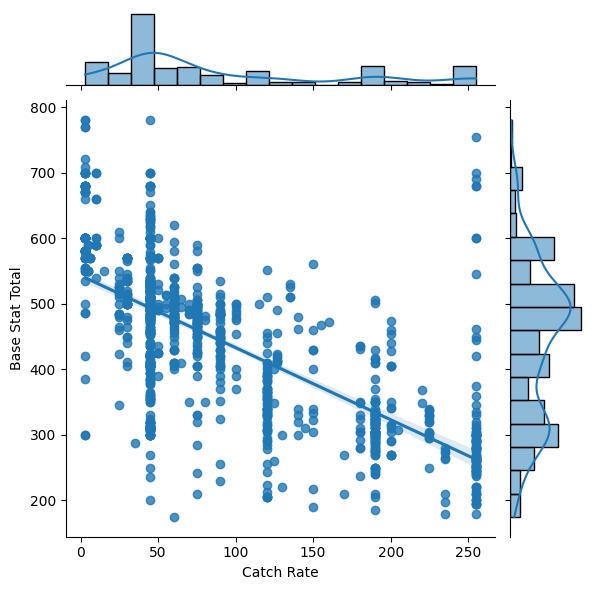

In [ ]:
sns.jointplot(x='Catch Rate', y='Base Stat Total', data=df, kind='reg')
plt.show()

In [ ]:
df[['Catch Rate', 'Base Stat Total']].corr()

,Catch Rate,Base Stat Total
Catch Rate,1.000000,-0.697414
Base Stat Total,-0.697414,1.000000


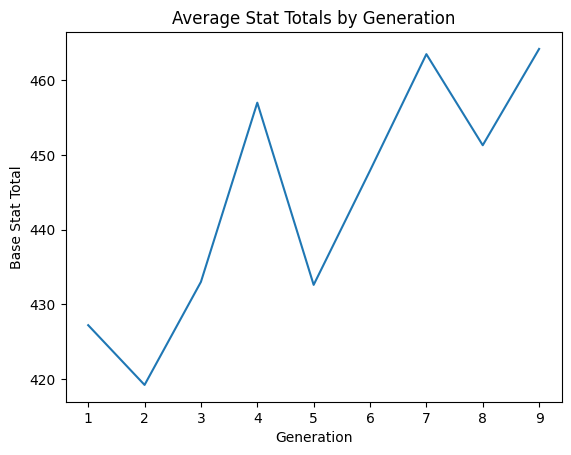

In [ ]:
sns.lineplot(x='Generation', y='Base Stat Total', data=gen_avg)
plt.title('Average Stat Totals by Generation')
plt.show()

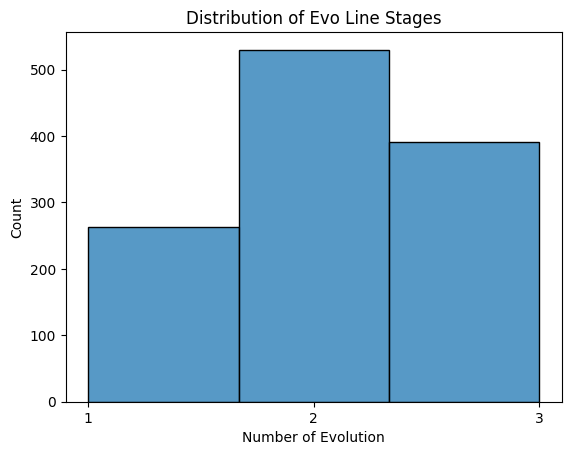

In [ ]:
sns.histplot(x='Number of Evolution', data=df, bins=3)
plt.xticks([1, 2, 3])
plt.title('Distribution of Evo Line Stages')
plt.show()

In [ ]:
df.value_counts('Number of Evolution', normalize=True)

,proportion
Number of Evolution,
2,0.447635
3,0.330236
1,0.222128
